In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import ast 
from collections import Counter
!pip install wordcloud
from wordcloud import WordCloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 460.4/460.4 KB 53.4 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
movies = pd.read_csv('tmdb_5000_movies.csv')
credits = pd.read_csv('tmdb_5000_credits.csv')

In [ ]:
movies.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466


In [ ]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [ ]:
print("Shape of movies dataset:",movies.shape)
print("Shape of credits dataset:",credits.shape)

Shape of movies dataset: (4803, 20)
Shape of credits dataset: (4803, 4)


In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [ ]:
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


## Q1: Combine the two datsets as one dataframe

In [ ]:
df = pd.concat([movies,credits],axis=1)

In [ ]:
df.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,title,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


## Q2: Remove the following columns:
- 'homepage','tagline','id','overview','status','original_title','movie_id'.

In [ ]:
df.drop(['homepage','tagline','id','overview','status','original_title','movie_id'],axis=1,inplace=True)
df.columns

Index(['budget', 'genres', 'keywords', 'original_language', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'title', 'vote_average',
       'vote_count', 'title', 'cast', 'crew'],
      dtype='object')

In [ ]:
movies.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466


## Q3: Create Genres dataframe that hase two coulumns Genres and Frequency
- Hint: Use Counter to calculate Frequency
- Add new catagory to Genres called Others when the Frequency < 200

In [ ]:
import json 
geners_json = df['genres'].apply(json.loads).apply(lambda x: [i['name'] for i in x])
geners_json

0       [Action, Adventure, Fantasy, Science Fiction]
1                        [Adventure, Fantasy, Action]
2                          [Action, Adventure, Crime]
3                    [Action, Crime, Drama, Thriller]
4                [Action, Adventure, Science Fiction]
                            ...                      
4798                        [Action, Crime, Thriller]
4799                                [Comedy, Romance]
4800               [Comedy, Drama, Romance, TV Movie]
4801                                               []
4802                                    [Documentary]
Name: genres, Length: 4803, dtype: object

In [ ]:
geners_list = [i for x in geners_json for i in x]
geners_list

['Action',
 'Adventure',
 'Fantasy',
 'Science Fiction',
 'Adventure',
 'Fantasy',
 'Action',
 'Action',
 'Adventure',
 'Crime',
 'Action',
 'Crime',
 'Drama',
 'Thriller',
 'Action',
 'Adventure',
 'Science Fiction',
 'Fantasy',
 'Action',
 'Adventure',
 'Animation',
 'Family',
 'Action',
 'Adventure',
 'Science Fiction',
 'Adventure',
 'Fantasy',
 'Family',
 'Action',
 'Adventure',
 'Fantasy',
 'Adventure',
 'Fantasy',
 'Action',
 'Science Fiction',
 'Adventure',
 'Action',
 'Thriller',
 'Crime',
 'Adventure',
 'Fantasy',
 'Action',
 'Action',
 'Adventure',
 'Western',
 'Action',
 'Adventure',
 'Fantasy',
 'Science Fiction',
 'Adventure',
 'Family',
 'Fantasy',
 'Science Fiction',
 'Action',
 'Adventure',
 'Adventure',
 'Action',
 'Fantasy',
 'Action',
 'Comedy',
 'Science Fiction',
 'Action',
 'Adventure',
 'Fantasy',
 'Action',
 'Adventure',
 'Fantasy',
 'Action',
 'Adventure',
 'Adventure',
 'Fantasy',
 'Adventure',
 'Fantasy',
 'Adventure',
 'Drama',
 'Action',
 'Drama',
 'Romanc

In [ ]:
geners = pd.DataFrame(geners_list, columns=['Genres'])
geners_freq = Counter(geners['Genres'])
geners['Frequency'] = geners['Genres'].map(geners_freq)


In [ ]:
geners.drop_duplicates(inplace=True)
geners

,Genres,Frequency
0,Action,1154
1,Adventure,790
2,Fantasy,424
3,Science Fiction,535
9,Crime,696
12,Drama,2297
13,Thriller,1274
20,Animation,234
21,Family,513
44,Western,82


In [ ]:
for i in range(len(geners)):
    if geners['Frequency'][i] < 200:
        geners['Genres'][i] = 'Others'  

/tmp/ipykernel_76/2361427045.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geners['Genres'][i] = 'Others'


In [ ]:
geners.head()

,Genres,Frequency
0,Action,1154
1,Adventure,790
2,Fantasy,424
3,Science Fiction,535
4,Adventure,790


In [ ]:
geners.drop_duplicates(inplace=True,ignore_index=True)
geners.tail()

,Genres,Frequency
15,Others,144
16,Others,185
17,Others,110
18,Others,34
19,Others,8


## Q4: Use bar chart draws the relationship between genres of movies and Frequency.
![p1.png](attachment:p1.png)

In [ ]:
px.bar(geners,x='Genres',y='Frequency',color='Genres',title='Generes of Movies')

## Q5: Use pie chart to draw top 5 languages.

In [ ]:
movies.original_language.unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [ ]:
Top_5 = movies.original_language.value_counts().nlargest(5).reset_index()
Top_5.columns = ['Languages','Frequency']
Top_5['Languages'].replace({'en':'English','fr':'French','es':'Spanish','de':'German','zh':'Chinese'},inplace=True)
Top_5

,Languages,Frequency
0,English,4505
1,French,70
2,Spanish,32
3,Chinese,27
4,German,27


In [ ]:
fig = px.pie(Top_5,values='Frequency',names='Languages',color='Languages',title='Top 5 Languages')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()  

## Q6: Use WordCloud to draw genres.

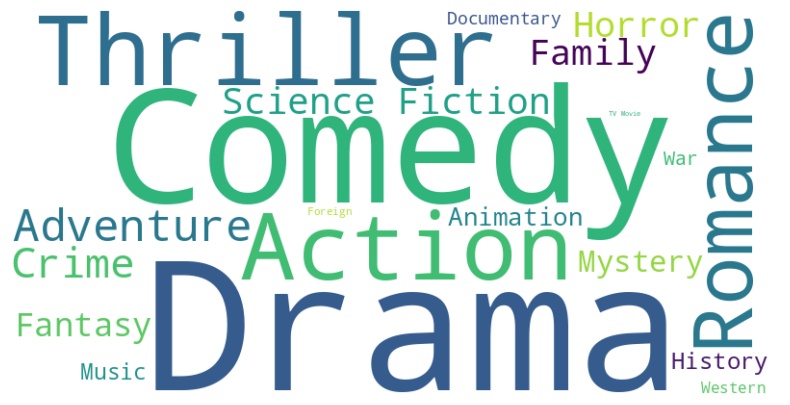

In [ ]:
word = geners.squeeze()
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(geners_freq)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


## Q7: Use scatter plot to draw the relationship between budget and revenue.


In [ ]:
fig = px.scatter(movies,x='revenue',y='budget',title='relationship between budget and revenue')


fig.update_layout(yaxis_tickformat=',.0s')  

# Show the plot
fig.show()

## Q8: Use line chart to draw the relationship between revenue and popularity.
![p4.png](attachment:p4.png)

In [ ]:
fig = px.line(movies, x='popularity', y='revenue', title='relationship between revenue and popularity'
,markers=True)
fig.update_traces(mode='markers')
fig.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f707314f-a403-45c6-94be-1c324eb3a057' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>